# Libraries

In [1]:
import scipy.io as sio
import sys

import pandas as pd
import numpy as np

import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.api import VAR

sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts

In [2]:
sst = sio.loadmat('data/sst.mat')
sst

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:14:49 2013',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[array([[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]])],
        [array([[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]])],
        [array([[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]])],
        ...,
        [array([[29.58, 29.12,

In [3]:
N = len(sst['X'])
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


# Applying the Discrete Cosine Transform

In [4]:
tensor_shape = (len(sst['X']), sst['X'][0][0].shape[0], sst['X'][0][0].shape[1])
tensor_shape

(2000, 5, 6)

In [5]:
tensor_data = np.zeros(tensor_shape)
for i in range(tensor_shape[0]):
    tensor_data[i] = sst['X'][i][0]
tensor_data

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [6]:
train_tensor = jts.extract_train_tensor(tensor_data, N_train)
train_tensor

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.21, 29.03, 28.53, 28.37, 27.62, 27.97],
        [29.48, 28.78, 28.19, 26.28, 25.95, 25.73],
        [29.04, 28.46, 27.52, 25.5 , 23.52, 22.35],
        [29.49, 29.14, 28.04, 27.61, 25.64, 2

In [7]:
test_tensor = jts.extract_test_tensor(tensor_data, N_train, N_test)
test_tensor

array([[[29.32, 29.01, 28.58, 28.38, 27.63, 27.98],
        [29.45, 28.74, 28.19, 26.29, 25.96, 25.69],
        [29.  , 28.42, 27.52, 25.5 , 23.62, 22.75],
        [29.49, 29.14, 28.03, 27.61, 25.62, 24.38],
        [29.85, 29.48, 28.6 , 27.61, 26.28, 24.48]],

       [[29.35, 29.  , 28.6 , 28.39, 27.64, 27.99],
        [29.46, 28.75, 28.21, 26.32, 25.98, 25.68],
        [28.99, 28.41, 27.54, 25.54, 23.7 , 22.9 ],
        [29.48, 29.15, 28.05, 27.62, 25.65, 24.42],
        [29.83, 29.48, 28.62, 27.62, 26.29, 24.51]],

       [[29.29, 28.93, 28.62, 28.4 , 27.66, 28.  ],
        [29.47, 28.76, 28.24, 26.35, 25.97, 25.69],
        [29.01, 28.41, 27.58, 25.58, 23.74, 22.92],
        [29.48, 29.17, 28.08, 27.65, 25.67, 24.46],
        [29.84, 29.48, 28.67, 27.64, 26.32, 24.58]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [8]:
train_dct_tensor = jts.apply_dct_to_tensor(train_tensor)
train_dct_tensor

array([[[ 3.41580000e+02, -2.88603771e+00,  1.68008928e+00,
         -5.23259018e-01, -3.00000000e-02, -6.65722417e-01],
        [ 3.34640000e+02,  5.06318330e+00, -9.52627944e-01,
         -5.65685425e-02, -4.70000000e-01, -2.05031092e+00],
        [ 3.23060000e+02,  9.32519587e+00, -3.22161450e+00,
          2.68700577e-01,  9.40000000e-01,  1.20761002e+00],
        [ 3.33440000e+02,  7.05143101e+00, -4.36476804e+00,
          2.40416306e+00, -2.60000000e-01,  1.50068830e-01],
        [ 3.42500000e+02,  7.77305158e+00, -2.23434554e+00,
         -8.34386002e-01, -8.30000000e-01, -3.02107863e-01]],

       [[ 3.42280000e+02, -3.29588758e+00,  1.74937132e+00,
         -5.65685425e-01,  2.90000000e-01, -9.90719472e-01],
        [ 3.35060000e+02,  4.71822402e+00, -7.44781847e-01,
         -1.55563492e-01, -4.70000000e-01, -1.99929040e+00],
        [ 3.23660000e+02,  8.80258057e+00, -3.03108891e+00,
          4.10121933e-01,  6.70000000e-01,  1.26482228e+00],
        [ 3.34120000e+02,  6.5

In [9]:
matrix_shape = train_dct_tensor[0].shape
train_dct_tensor_model_sets = np.zeros((matrix_shape[1], N_train, matrix_shape[0]))
for i in range(matrix_shape[1]):
    for j in range(N_train):
        train_dct_tensor_model_sets[i][j] = train_dct_tensor[j][:,i]
train_dct_tensor_model_sets

array([[[ 3.41580000e+02,  3.34640000e+02,  3.23060000e+02,
          3.33440000e+02,  3.42500000e+02],
        [ 3.42280000e+02,  3.35060000e+02,  3.23660000e+02,
          3.34120000e+02,  3.42880000e+02],
        [ 3.43140000e+02,  3.36040000e+02,  3.24520000e+02,
          3.35100000e+02,  3.43540000e+02],
        ...,
        [ 3.41460000e+02,  3.28820000e+02,  3.12780000e+02,
          3.28440000e+02,  3.32360000e+02],
        [ 3.41420000e+02,  3.28640000e+02,  3.12880000e+02,
          3.28360000e+02,  3.32400000e+02],
        [ 3.41580000e+02,  3.28660000e+02,  3.13180000e+02,
          3.28460000e+02,  3.32460000e+02]],

       [[-2.88603771e+00,  5.06318330e+00,  9.32519587e+00,
          7.05143101e+00,  7.77305158e+00],
        [-3.29588758e+00,  4.71822402e+00,  8.80258057e+00,
          6.57882086e+00,  7.78164569e+00],
        [-3.66710041e+00,  4.02729009e+00,  8.52454259e+00,
          6.06517131e+00,  7.86095047e+00],
        ...,
        [ 4.47235927e+00,  1.2235356

In [10]:
test_tensor_model_sets = np.zeros((matrix_shape[1], N_test, matrix_shape[0]))
for i in range(matrix_shape[1]):
    for j in range(N_test):
        test_tensor_model_sets[i][j] = test_tensor[j][:,i]
test_tensor_model_sets

array([[[29.32, 29.45, 29.  , 29.49, 29.85],
        [29.35, 29.46, 28.99, 29.48, 29.83],
        [29.29, 29.47, 29.01, 29.48, 29.84],
        ...,
        [29.58, 29.33, 29.65, 30.19, 30.24],
        [29.61, 29.36, 29.78, 30.22, 30.26],
        [29.61, 29.45, 29.68, 30.41, 30.3 ]],

       [[29.01, 28.74, 28.42, 29.14, 29.48],
        [29.  , 28.75, 28.41, 29.15, 29.48],
        [28.93, 28.76, 28.41, 29.17, 29.48],
        ...,
        [29.12, 28.95, 28.86, 29.18, 29.48],
        [29.16, 28.95, 28.94, 29.28, 29.48],
        [29.18, 28.97, 29.  , 29.28, 29.48]],

       [[28.58, 28.19, 27.52, 28.03, 28.6 ],
        [28.6 , 28.21, 27.54, 28.05, 28.62],
        [28.62, 28.24, 27.58, 28.08, 28.67],
        ...,
        [29.23, 28.56, 28.2 , 28.15, 28.95],
        [29.25, 28.58, 28.28, 28.43, 29.26],
        [29.28, 28.61, 28.28, 28.49, 29.42]],

       [[28.38, 26.29, 25.5 , 27.61, 27.61],
        [28.39, 26.32, 25.54, 27.62, 27.62],
        [28.4 , 26.35, 25.58, 27.65, 27.64],
        ..

In [11]:
result_tensor_model_sets = np.zeros((matrix_shape[1], N_test, matrix_shape[0]))
result_tensor_model_sets.shape

(6, 200, 5)

# Building the Models

# Inverting the DCT

In [72]:
result_tensor_model_sets

array([[[ 3.41844869e+02,  3.28706577e+02,  3.13731288e+02,
          3.28593234e+02,  3.32575024e+02],
        [ 3.42012672e+02,  3.28903568e+02,  3.14381375e+02,
          3.28867633e+02,  3.32400624e+02],
        [ 3.41956497e+02,  3.29404950e+02,  3.15042847e+02,
          3.29234944e+02,  3.32571689e+02],
        ...,
        [ 3.42213491e+02,  3.27694821e+02,  3.12990656e+02,
          3.28647751e+02,  3.32606583e+02],
        [ 3.41974170e+02,  3.27561830e+02,  3.12731803e+02,
          3.28444752e+02,  3.32091177e+02],
        [ 3.41873679e+02,  3.27525851e+02,  3.12410532e+02,
          3.28360708e+02,  3.31394594e+02]],

       [[ 4.50062295e+00,  1.20421561e+01,  2.01520620e+01,
          1.50350676e+01,  1.54726136e+01],
        [ 4.46149889e+00,  1.19672103e+01,  1.99990389e+01,
          1.49259515e+01,  1.54082474e+01],
        [ 4.42413578e+00,  1.19195369e+01,  1.99233649e+01,
          1.48578350e+01,  1.53706021e+01],
        ...,
        [ 5.42114432e+00,  1.3008086

In [73]:
result_dct_tensor = np.zeros((N_test, matrix_shape[0], matrix_shape[1]))
result_dct_tensor

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 

In [74]:
for i in range(N_test):
    for j in range(matrix_shape[1]):
        result_dct_tensor[i][:,j] = result_tensor_model_sets[j][i]
result_dct_tensor

array([[[ 3.41844869e+02,  4.50062295e+00,  5.10401748e-01,
         -3.80297096e-01,  9.34328789e-01, -9.32989156e-01],
        [ 3.28706577e+02,  1.20421561e+01,  1.33809263e+00,
         -1.42467231e+00,  3.57316479e-01,  1.62443583e+00],
        [ 3.13731288e+02,  2.01520620e+01, -2.28344221e+00,
         -7.29197811e-01,  5.97439121e-01,  3.67688681e-01],
        [ 3.28593234e+02,  1.50350676e+01, -3.06302533e+00,
          1.68624004e+00, -2.35222788e-02, -1.50312672e+00],
        [ 3.32575024e+02,  1.54726136e+01, -3.23406570e+00,
          1.71252567e+00, -9.87359022e-01,  1.67563471e-01]],

       [[ 3.42012672e+02,  4.46149889e+00,  5.27909294e-01,
         -3.70718261e-01,  9.50326550e-01, -9.26152820e-01],
        [ 3.28903568e+02,  1.19672103e+01,  1.39186195e+00,
         -1.43861149e+00,  3.76837844e-01,  1.62653974e+00],
        [ 3.14381375e+02,  1.99990389e+01, -2.19748803e+00,
         -7.58457967e-01,  6.18879487e-01,  3.69193030e-01],
        [ 3.28867633e+02,  1.4

In [75]:
result_tensor = jts.apply_inverse_dct_to_tensor(result_dct_tensor)
result_tensor

array([[[29.27808361, 29.01652672, 28.58002288, 28.40250312,
         27.64617518, 27.99912297],
        [29.45593969, 28.72830137, 28.17772399, 26.27998421,
         25.93702266, 25.77431665],
        [29.03863098, 28.46224836, 27.53806678, 25.50922739,
         23.62715327, 22.69031722],
        [29.49304535, 29.13700947, 28.03076912, 27.61506873,
         25.63637028, 24.38435401],
        [29.86545893, 29.48103953, 28.59168966, 27.60651551,
         26.27725079, 24.46555753]],

       [[29.29105263, 29.02129866, 28.59109664, 28.41700885,
         27.66403784, 28.02184143],
        [29.46812597, 28.73402608, 28.1867543 , 26.29151743,
         25.95762267, 25.81373763],
        [29.07897972, 28.49808597, 27.5787106 , 25.55569193,
         23.69251666, 22.78670251],
        [29.50482607, 29.14661754, 28.04462066, 27.63497761,
         25.66763131, 24.43514323],
        [29.84471037, 29.46016195, 28.57007111, 27.58870224,
         26.26826103, 24.46840526]],

       [[29.28129064, 29.0

In [76]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "VAR with DCT"})
error

,VAR with DCT
0,0.000919595
1,0.00168478
2,0.00213836
3,0.00261284
4,0.00342555
...,...
195,0.0199096
196,0.0190705
197,0.0191059
198,0.020006


<AxesSubplot:>

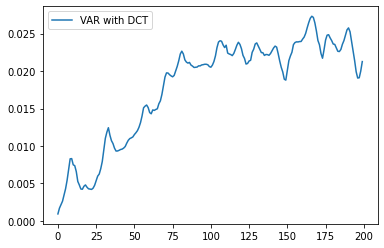

In [77]:
error.plot()

<AxesSubplot:>

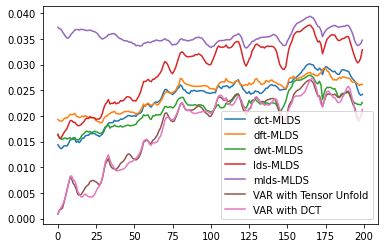

In [78]:
sst_err = sio.loadmat('data/sst_err.mat')
df = pd.DataFrame(np.transpose(sst_err['err_dct']), index=error.index, columns=["dct-MLDS"])
df1 = pd.DataFrame(np.transpose(sst_err['err_dft']), index=error.index, columns=["dft-MLDS"])
df2 = pd.DataFrame(np.transpose(sst_err['err_dwt']), index=error.index, columns=["dwt-MLDS"])
df3 = pd.DataFrame(np.transpose(sst_err['err_lds']), index=error.index, columns=["lds-MLDS"])
df4 = pd.DataFrame(np.transpose(sst_err['err_mlds']), index=error.index, columns=["mlds-MLDS"])
tensor_unfold_err = pd.read_csv("data/VAR_with_unfold.csv")
del tensor_unfold_err['Unnamed: 0']
df = pd.concat([df, df1, df2, df3, df4, tensor_unfold_err, error], axis=1)
df.plot()

<AxesSubplot:>

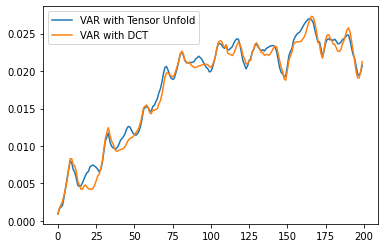

In [79]:
df = pd.concat([tensor_unfold_err, error], axis=1)
df.plot()

In [80]:
tensor_unfold_err.mean()

VAR with Tensor Unfold    0.018129
dtype: float64

In [81]:
error.mean()

VAR with DCT    0.017829
dtype: float64

In [82]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,29.32,29.45,29.00,29.49,29.85,29.01,28.74,28.42,29.14,29.48,...,27.63,25.96,23.62,25.62,26.28,27.98,25.69,22.75,24.38,24.48
1,29.35,29.46,28.99,29.48,29.83,29.00,28.75,28.41,29.15,29.48,...,27.64,25.98,23.70,25.65,26.29,27.99,25.68,22.90,24.42,24.51
2,29.29,29.47,29.01,29.48,29.84,28.93,28.76,28.41,29.17,29.48,...,27.66,25.97,23.74,25.67,26.32,28.00,25.69,22.92,24.46,24.58
3,29.35,29.50,29.09,29.55,29.88,29.02,28.80,28.45,29.20,29.48,...,27.67,25.96,23.84,25.68,26.35,28.00,25.68,22.82,24.49,24.61
4,29.47,29.58,29.23,29.66,29.95,29.21,28.89,28.52,29.24,29.48,...,27.70,25.98,23.89,25.68,26.37,27.99,25.69,22.78,24.49,24.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,29.59,29.26,29.42,29.84,30.11,29.06,28.81,28.74,29.02,29.48,...,27.31,25.48,23.56,25.25,26.60,27.75,23.05,22.26,23.84,24.53
196,29.57,29.31,29.54,29.99,30.16,29.08,28.86,28.78,29.11,29.48,...,27.29,25.60,23.56,25.31,26.61,27.74,23.22,22.29,23.84,24.55
197,29.58,29.33,29.65,30.19,30.24,29.12,28.95,28.86,29.18,29.48,...,27.29,25.68,23.54,25.32,26.62,27.73,23.33,22.22,23.81,24.53
198,29.61,29.36,29.78,30.22,30.26,29.16,28.95,28.94,29.28,29.48,...,27.28,25.74,23.52,25.32,26.61,27.71,23.39,22.16,23.75,24.50


In [83]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,29.278084,29.455940,29.038631,29.493045,29.865459,29.016527,28.728301,28.462248,29.137009,29.481040,...,27.646175,25.937023,23.627153,25.636370,26.277251,27.999123,25.774317,22.690317,24.384354,24.465558
1,29.291053,29.468126,29.078980,29.504826,29.844710,29.021299,28.734026,28.498086,29.146618,29.460162,...,27.664038,25.957623,23.692517,25.667631,26.268261,28.021841,25.813738,22.786703,24.435143,24.468405
2,29.281291,29.505485,29.125578,29.525935,29.853676,29.010337,28.769176,28.543962,29.169003,29.470357,...,27.662983,26.002628,23.752937,25.703771,26.286030,28.023324,25.868130,22.860991,24.480340,24.490666
3,29.294415,29.544049,29.163932,29.548204,29.864118,29.023216,28.806815,28.583275,29.192806,29.481330,...,27.675956,26.040312,23.792723,25.727589,26.293511,28.036087,25.908482,22.904158,24.505641,24.497303
4,29.315131,29.580099,29.195189,29.596100,29.893249,29.043500,28.842262,28.615612,29.241410,29.510483,...,27.688796,26.067606,23.814139,25.764510,26.312814,28.046610,25.934119,22.922894,24.539420,24.513005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,29.497177,29.591854,29.225958,29.682195,30.044952,29.187479,28.738299,28.624080,29.312094,29.561562,...,27.619418,25.775038,23.465492,25.533028,26.250157,27.913170,25.607471,22.581976,24.338994,24.335401
196,29.469801,29.577273,29.199155,29.661278,30.001382,29.159922,28.723129,28.597181,29.291120,29.517479,...,27.590887,25.759046,23.436955,25.510672,26.205636,27.884336,25.591337,22.553533,24.316844,24.290317
197,29.442269,29.564057,29.157068,29.643544,30.027656,29.132209,28.709324,28.554999,29.273329,29.543239,...,27.562201,25.744418,23.393135,25.491498,26.230958,27.855346,25.576568,22.509806,24.297875,24.315077
198,29.422945,29.553899,29.136406,29.627357,29.985470,29.112703,28.698577,28.534242,29.257086,29.500541,...,27.541722,25.732848,23.370739,25.473872,26.187822,27.834564,25.564857,22.487504,24.280454,24.271378


In [84]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       -0.165         0.063          0.180          0.606%        
1       -0.089         0.053          0.170          0.572%        
2       -0.230         0.125          0.271          0.916%        
3       -0.192         0.110          0.238          0.792%        
4       -0.258         0.110          0.259          0.852%        
5       -0.104         0.065          0.165          0.562%        
6       -0.186         0.079          0.206          0.709%        
7       -0.310         0.156          0.321          1.108%        
8       0.087          0.051          0.181          0.622%        
9       0.018          0.003          0.048          0.164%        
10      -0.154         0.064          0.182          0.629%        
11      -0.137         0.041          0.152          0.536%        
12      -0.210         0.080          0.222  